
# DMT 2022 - Homework 3

# Homework
In this homework, your goal will be to obtain the best classification on the provided dataset according to a metric specified in each section.

Ensure that the results you obtain can be accurately replicated by anyone running the notebook.

If you have to set a random seed, always choose: `2468`.

## Group composition:


D'Erasmo, Giulio, 1859130

Potì, Andrea, 2008416


# Part 1: Text classification 
In this part of the homework, simple data encodings will be used.

## Part 1.0
Import **ALL** the Python packages that you need for Part 1.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
import pandas as pd; import numpy as np; import nltk; import matplotlib.pyplot as plt 
import time; import sklearn; from sklearn.pipeline import Pipeline; import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer; import string 
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV 
from sklearn.naive_bayes import MultinomialNB ; from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA; from sklearn.preprocessing import StandardScaler 
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

### 1.0.1
Download the dataset from the Drive link (code already provided).

The dataset is a list of reviews, containing the text and the sentiment of the review; 1 represents a positive review, while 0 represents a negative review. The file has no header.

In [ ]:
#REMOVE_OUTPUT#
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#REMOVE_OUTPUT#
!gdown 1oDvIo7sMAlxdF82uMXkYEmoeV7P4evcs #download hw3_data.csv

Downloading...
From: https://drive.google.com/uc?id=1oDvIo7sMAlxdF82uMXkYEmoeV7P4evcs
To: /content/hw3_data.csv
100% 10.7M/10.7M [00:00<00:00, 30.3MB/s]


## Part 1.1
In this part, we will perform a tf-idf encoding of the data,
and then train a classifier, optimising its hyper-parameters.

In the various steps, we will slowly prepare a pipeline to perform a hyper-parameter optimisation; try to prepare the required objects with this target in mind.

The goal is to maximise the f1-score on the test set that will be defined in step 1.1.2.

### 1.1.1
Load and inspect the dataset: print the total number of rows.

Print also the first 3 rows of the dataset.

In [ ]:
#YOUR CODE STARTS HERE#
data = pd.read_csv('/content/hw3_data.csv', header = None)

# there is a NA value inside the dataset
data = data.dropna(axis = 0)
# We also decide to drop duplicate row, due to it may bias the text classification 
data = data.drop_duplicates()

# option to see all the review in full length
# understanding how the text is composed of
pd.set_option('display.max_colwidth', None)

# print the total number of rows
print("The total number of rows are: ", data.shape[0])
# print the first 3 rows of the dataset
print("\nThe first 3 rows of the dataset are:")
display(data[:3])


#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

The total number of rows are:  21956

The first 3 rows of the dataset are:


,0,1
0,"When I first had this tea, the taste was familar, as was the sensation that I couldn't immediately tell if I loved or hated it. What it reminded me of was those hard red candies called ""fireballs."" It is a very strong and spicey tea. I am now buying it in multiple packs of 50 which I keep in the freezer for freshness, so I guess you could say that I made up my mind.",1
1,"There was no size information included in Amazon's description, so I went looking for it.\n\n* Measures 191"" x 48"" x 46"" h., constructed of 2"" steel tubing, two large plated ""S"" hooks\n* Fits up to 14 ft. hammocks (hammock not included)\n* Easy to set-up\n* Assembly / information sheet\n* Weighs 56 1/2 lbs.",1
2,This one is just as bright as the AA Mini MagLite and is considerably thinner and lighter. Extremely durable. I've had one for several years now and it's taken quite a beating in the car and in my toolbox,1


### 1.1.2
Divide the dataset into training set (85%) and test set (15%).

Print out the percentage of samples with positive labels in the training set and the percentage of samples with positive labels in the test set.

In [ ]:
#YOUR CODE STARTS HERE#
## Split the data in text and label
x = data[0].to_numpy()
y = data[1].to_numpy()

# Divide Train and Test data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15,
                                    shuffle=True, random_state = 2468)

# print the percentage of samples with positive labels
# in the training set (since the positive review are labeled as 1
# we can just use the mean):
training_positive_perc = np.mean(train_y)*100
test_positive_perc = np.mean(test_y)*100
print(f"Training Set Percentage of positive labels: {np.round(training_positive_perc, 3)}%")
print(f"Test Set Percentage of positive labels: {np.round(test_positive_perc,3)}%")


#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Training Set Percentage of positive labels: 51.859%
Test Set Percentage of positive labels: 51.913%


### 1.1.3
Create an object that performs a tf-idf transformation on the data. The transformation must strip accents.

Create a dictionary containing configurations for the tf-idf vectorizer.
The configurations must vary at least 3 different parameters.

In [ ]:
#YOUR CODE STARTS HERE#
## Vectorization object
vectorizer = TfidfVectorizer(strip_accents = "ascii", preprocessor = None)
## Stemmer function
nltk.download('punkt'); nltk.download('stopwords'); 
stemmer = nltk.stem.snowball.EnglishStemmer(); english_stopwords = set(nltk.corpus.stopwords.words('english'))
def stemming_tokenizer(text):
	stemmed_text = [stemmer.stem(word) for word in nltk.word_tokenize(text, language='english')]
	return stemmed_text
def stemming_stop_tokenizer(text):
	stemmed_text = [stemmer.stem(word) for word in nltk.word_tokenize(text, language='english')
	                										if word not in english_stopwords]
	return stemmed_text

## parameter for the TfidfVectorizer
vect_parameters = {'vect__tokenizer': [None, stemming_tokenizer, stemming_stop_tokenizer],
                   'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                   'vect__min_df': [0.0, 0.15, 0.3]}
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 1.1.4
Choose a maximum of 2 classification algorithms (from those seen during the course) and prepare objects containing them.

For each of the selected classification algorithms, prepare a hyper-parameter configuration with exactly **5 values** for **EACH parameter**.

> **If a parameter is itself composed of several parameters (if it is a dictionary, for example), each of these will need to have 5 values.*

In [ ]:
#YOUR CODE STARTS HERE#

# FIRST CLASSIFIER: KNN ------
KNN_clf = KNeighborsClassifier()

KNN_parameters = {'clf__n_neighbors': [3, 5, 9, 15, 20],
                  'clf__n_jobs': [-1]}

# SECOND CLASSIFIER: NAIVE BAYES ----
NB_clf = MultinomialNB()

NB_parameters = {'clf__alpha': [0.01, 0.1, 1., 15., 30.]}
















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

### 1.1.5
For each of the classification algorithms selected in step 1.1.4,
perform a 3-fold Cross-Validation on the training set, combining the configurations of the vectorizer defined in step 1.1.3 and those of the classifier being used defined in step 1.1.4.

Perform the best hyper-parameter optimisation you can afford in **LESS than 30 minutes**. Print out the total time taken.

If you are using two classifications algorithms, the maximum total optimisation time is **INSTEAD** 60 minutes.

In [ ]:
#YOUR CODE STARTS HERE#
all_grid_search = {}

def automated_random_grid_search(clf, vect_parameters, clf_parameters):
  # define pipeline: vectorizer -> classifier
  pipeline = sklearn.pipeline.Pipeline([
	('vect', vectorizer),
	('clf', clf),
	])
  # parameters dictionary for the complete pipeline
  parameters = {**vect_parameters, **clf_parameters}
  # 52 min
  grid_search = RandomizedSearchCV( pipeline, parameters,
                                    scoring = "f1",
                                    cv = 3, verbose = 1, 
                                    random_state = 2468, 
                                    n_iter = 20, 
                                   )
  # start the search
  grid_search.fit(train_x, train_y)
  return grid_search

start_time = time.time()
all_grid_search["KNN"] = automated_random_grid_search(KNN_clf, vect_parameters, KNN_parameters)
all_grid_search["NB"] = automated_random_grid_search(NB_clf, vect_parameters, NB_parameters)


end_time = time.time()

minutes, seconds = divmod(end_time - start_time, 60)
print(f"--- Total time: {minutes}:{seconds} min ---")







#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
--- Total time: 51.0:58.484092712402344 min ---


### 1.1.6
For each of the optimisations run in step 1.1.5:
  1. Select the 3 best configurations and print them.
  2. Produce a plot with mean and standard deviation of the f1-score calculated on the test set.

The top 3 configuration for KNN is:



,vect__tokenizer,vect__ngram_range,vect__min_df,clf__n_neighbors,clf__n_jobs,mean_test_score
0,<function stemming_tokenizer at 0x7f2adf2843b0>,"(1, 3)",0.0,9,-1,0.771969
1,None,"(1, 1)",0.0,20,-1,0.740050
2,<function stemming_tokenizer at 0x7f2adf2843b0>,"(1, 3)",0.0,3,-1,0.729970


The top 3 configuration for Naive Bayes is:



,vect__tokenizer,vect__ngram_range,vect__min_df,clf__alpha,mean_test_score
0,<function stemming_tokenizer at 0x7f2adf2843b0>,"(1, 3)",0.0,1.00,0.893469
1,<function stemming_tokenizer at 0x7f2adf2843b0>,"(1, 3)",0.0,0.01,0.883337
2,<function stemming_tokenizer at 0x7f2adf2843b0>,"(1, 2)",0.0,0.01,0.859357


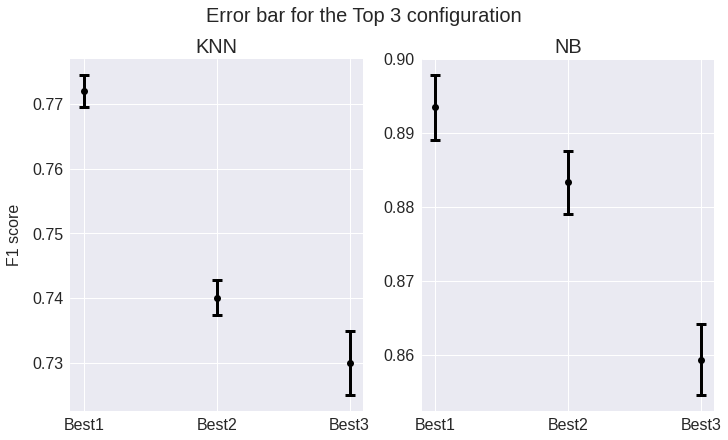

In [ ]:
#YOUR CODE STARTS HERE#
KNN_top3 = pd.DataFrame(all_grid_search["KNN"].cv_results_).sort_values("rank_test_score", axis = 0).head(3)
NB_top3  = pd.DataFrame(all_grid_search["NB"].cv_results_).sort_values("rank_test_score", axis = 0).head(3)
# print configuration
print("The top 3 configuration for KNN is:\n")
display(pd.concat([pd.DataFrame(list(KNN_top3["params"])), KNN_top3["mean_test_score"].reset_index(drop=True)], axis = 1))
print("The top 3 configuration for Naive Bayes is:\n")
display(pd.concat([pd.DataFrame(list(NB_top3["params"])), NB_top3["mean_test_score"].reset_index(drop=True)], axis = 1))
print()
# Creating plot
plt.style.use('seaborn'); fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 6),constrained_layout=True)
fig.suptitle('Error bar for the Top 3 configuration', fontsize=20); ax1.set_title('KNN',fontsize=20); ax2.set_title('NB',fontsize=20);
ax1.errorbar(np.arange(0, 1.5, step = 0.5), KNN_top3["mean_test_score"], KNN_top3["std_test_score"], fmt = "ok", lw = 3, capsize=5, capthick=3)
ax2.errorbar(np.arange(0, 1.5, step = 0.5), NB_top3["mean_test_score"], NB_top3["std_test_score"], fmt = "ok", lw = 3, capsize=5, capthick=3)
ax1.set_xticks(np.arange(0, 1.5, step = 0.5)); ax1.set_xticklabels(labels = ["Best1", "Best2", "Best3"])
ax2.set_xticks(np.arange(0, 1.5, step = 0.5)); ax2.set_xticklabels(labels = ["Best1", "Best2", "Best3"])
ax1.tick_params(axis='both', which='major', labelsize=16); ax2.tick_params(axis='both', which='major', labelsize=16)
ax1.set_ylabel("F1 score", labelpad = 10, fontsize = 16); 
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

For each plot produced, which combination of hyper-parameters would you select?

**Use at most 2 sentences (per plot).**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

In the first plot about the error bar for the KNN classifier we chose to retain the Best1. 

This is because in average is the best, and also its small standard deviation from the mean let us to choose this configuration over the others, which have lower accuracy in average and for the third configuration, also larger error. 

For the NB classifier we also retain the Best1 classifier, which seems identical to the Best2, but slightly better in average.

### 1.1.7
For each of the optimisations, obtain a classifier using the parameters you selected in step 1.1.6.

Apply the classifier(s) to obtain the confusion matrix on the test data and print it out.

In [ ]:
#YOUR CODE STARTS HERE#
# KNN -----
best_KNN = KNN_top3["params"].iloc[0]
pipeline = Pipeline([
	('vect', vectorizer),
	('clf', KNN_clf),
	])
pipeline.set_params(**best_KNN)
pipeline.fit(train_x, train_y)
KNN_y_pred = pipeline.predict(test_x)

# NB ----
best_NB = NB_top3["params"].iloc[0]
pipeline = Pipeline([
	('vect', vectorizer),
	('clf', NB_clf),
	])
pipeline.set_params(**best_NB)
pipeline.fit(train_x, train_y)
NB_y_pred = pipeline.predict(test_x)

# Compute the confusion matrix
confusion_matrix_KNN = sklearn.metrics.confusion_matrix(test_y, KNN_y_pred)
confusion_matrix_NB = sklearn.metrics.confusion_matrix(test_y, NB_y_pred)
# display
print("\nThe confusion matrix for the KNN is:")
display(pd.DataFrame(confusion_matrix_KNN))
print("\nThe confusion matrix for the NB is:")
display(pd.DataFrame(confusion_matrix_NB))
#YOUR CODE ENDS HERE#
#THIS IS LINE 30#


The confusion matrix for the KNN is:


,0,1
0,1183,401
1,373,1337



The confusion matrix for the NB is:


,0,1
0,1342,242
1,137,1573


## Part 1.2
In this part, we will perform a one-hot encoding of the data, then train a classifier, optimising its hyper-parameters.

The goal is to maximise accuracy on the test set defined in step 1.1.2

### 1.2.1
Use the same data partitioned in part 1.1.2.

Transform the data with one-hot encoding.

In [ ]:
#YOUR CODE STARTS HERE# 
nltk.download('words'); words = set(nltk.corpus.words.words())
def preprocessing(text):
  punctuationfree = "".join([i for i in text if i not in string.punctuation+"\n"])
  tokens = punctuationfree.lower().split()
  stemming_tokens = [stemmer.stem(i) for i in tokens  if (i in words)] #and (i not in english_stopwords)]
  return stemming_tokens
# One hot encoding realize by specifiy TfidVectorizer tf = 1, idf = 1, normalize = False
# Also we remove the words that appear less than the 0.5% of documents, this reduce a lot the
# number of word in our final dictionary. We have done this because due to the limitation of 
# RAM storage of Colab we can't store a dense very large matrix (to pass to PCA).
# Also is more important occurencies than frequencies.
vectorizer = TfidfVectorizer(strip_accents = "ascii", tokenizer = preprocessing, min_df = 0.005, 
                             binary = True, use_idf=False, norm = None)
# Fit on the training set and transform both
OneHotMatrix_train_x = vectorizer.fit_transform(train_x).A
OneHotMatrix_test_x  = vectorizer.transform(test_x).A
print("OneHotEncoding dimension on train_x:", OneHotMatrix_train_x.shape)
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


OneHotEncoding dimension on train_x: (18662, 1087)


### 1.2.2
Before training the classifier, transform the data using Principal Component Analysis.

Taking into account the objective of Part 1.2 and the limitations explained in the following steps, estimate and select the best number of components.

Multiple code cells are provided, but it is **NOT** mandatory to use them all.

In [ ]:
#YOUR CODE STARTS HERE#
# Standardize OneHotEncoder to perform the PCA
scaler = StandardScaler()
OneHotMatrix_train_x = scaler.fit_transform(OneHotMatrix_train_x)
# Perform PCA with the maximum n_components
# We use a small number of component just to achive PCA w/out Colab to stop running
# by exceed of RAM usage, and in the same time to see some information on the below plot
n_components = 100
pca = PCA(n_components, random_state = 2468)
PCA_train_x = pca.fit_transform(OneHotMatrix_train_x)

# SELECT THE NUMBER OF COMPONENT
num_of_components_needed = 25
PCA_train_x = PCA_train_x[:, :num_of_components_needed]
# FIT ON THE TEST
OneHotMatrix_test_x = scaler.transform(OneHotMatrix_test_x)
PCA_test_x = pca.transform(OneHotMatrix_test_x)
PCA_test_x = PCA_test_x[:, :num_of_components_needed]
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

# Components needed: 35
Explained variance ratio: 0.1008784644362353


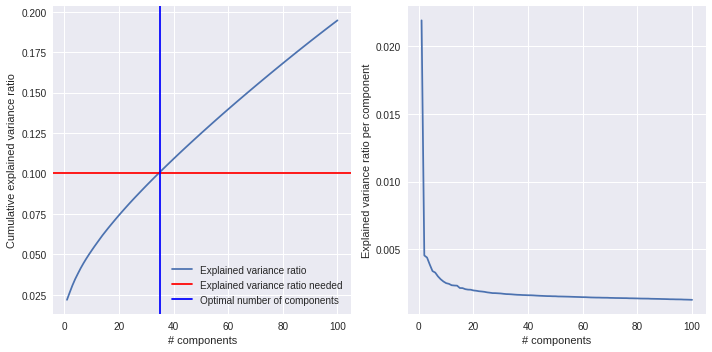

In [ ]:
#YOUR CODE STARTS HERE#
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# CUMULATIVE EXPLAINED VARIANCE RATIO PLOT
exp_var_ratio_needed = 0.1
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_of_components_needed = np.where(cumulative_explained_variance_ratio>exp_var_ratio_needed)[0][0]+1
print("# Components needed:", num_of_components_needed)
print("Explained variance ratio:",cumulative_explained_variance_ratio[num_of_components_needed-1])
axes[0].plot(range(1,n_components+1),np.cumsum(pca.explained_variance_ratio_))
axes[0].set_xlabel("# components"); axes[0].set_ylabel("Cumulative explained variance ratio")
axes[0].axhline(exp_var_ratio_needed, color="red"); axes[0].axvline(num_of_components_needed, color="blue")
axes[0].legend(["Explained variance ratio","Explained variance ratio needed","Optimal number of components"])
# ELBOW PLOT
axes[1].plot(range(1,n_components+1),pca.explained_variance_ratio_)
axes[1].set_xlabel("# components")
axes[1].set_ylabel("Explained variance ratio per component")
fig.tight_layout()
plt.show()
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Explain your decision in **at most 2 sentences**.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

1. Due to the restrict time we try to reduce as possible the vocabolary for One Hot Encoding using a specific preproccessing and deleting word that appears in less than the 0.5% of documents, because for us the important thing was to have word occurances first.

2. For the same problem as before we need to pass to the classifier low number of features, because the Brute Force KNN must compute the distance among all the points, so using a low number of features allow us to have the right amont of explained variance and remain in the time.

### 1.2.3
You must optimise the hyper-parameters of a classifier by respecting the following limits:
> Regarding the classifier:
  * The classifier must be **KNeighborsClassifier**
  * The algorithm used must be **"brute"**.
  * It is forbidden to run the algorithm in *parallel* (must be specified)

> Regarding the optimisation:
  * A **9-fold** Cross-Validation must be performed
  * You must test **exactly 20** configurations
  * Optimisation CANNOT take longer than **100 seconds**. Print out the execution time
  * It is forbidden to run the optimisation in *parallel* (must be specified)

In [ ]:
#YOUR CODE STARTS HERE#
scaler2 = StandardScaler()
PCA_train_x_scale = scaler2.fit_transform(PCA_train_x)

clf = KNeighborsClassifier()
KNN_parameters = {'n_neighbors': [1,2,3,10], # 3 value fast, 1 big enough slow
                  "weights": ["uniform", "distance"], 
                  "metric": ["cosine","cityblock", "euclidean"], # faster metrics in sklearn
                  'algorithm': ['brute'], # Brute
                  'n_jobs': [1]  # No Parallel
 }

grid_search = RandomizedSearchCV( clf, 
                            param_distributions = KNN_parameters,
                            cv = 9, verbose = 1,  n_iter = 20,
                            n_jobs = 1,  # No Parallel
                            random_state = 2468,
                            scoring = "accuracy"
                          )

start_time = time.time()
grid_search.fit(PCA_train_x_scale, train_y)
print("--- %s seconds ---" % round(time.time() - start_time, 3))

print()
print(f"We obtain an accuracy on the test set of {round(grid_search.best_score_,3)}" )


#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Fitting 9 folds for each of 20 candidates, totalling 180 fits
--- 92.415 seconds ---

We obtain an accuracy on the test set of 0.777


### 1.2.4
Select the combination of hyper-parameters that obtains the **best accuracy**.

Apply the classifier that uses these parameters to obtain the confusion matrix on the test data and print it out.

In [ ]:
#YOUR CODE STARTS HERE#
best_model = grid_search.best_estimator_
PCA_test_x_scaled = scaler2.transform(PCA_test_x)  

KNN_y_pred = best_model.predict(PCA_test_x_scaled)

# Compute the confusion matrix
confusion_matrix_KNN = sklearn.metrics.confusion_matrix(test_y, KNN_y_pred)

# display
print("The confusion matrix for the KNN is:")
display(pd.DataFrame(confusion_matrix_KNN))
 















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

The confusion matrix for the KNN is:


,0,1
0,1238,346
1,378,1332


# Part 2: Transformer for sentence embeddings
In this part of the homework, more complex data encodings will be used.

## Part 2.0
Import here **ALL** the Python packages that you need for Part 2.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import PredefinedSplit
from sklearn.svm import SVC; import sklearn.metrics; import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Part 2.1
In this part, we will use a Transformer to obtain sentence embeddings for each document.

We will then train a classifier, optimising its hyper-parameters.

The goal is to maximise precision on the test set defined in step 1.1.2, but it is necessary to have a recall of **at least 70%**, according to the optimisation results.


### 2.1.1
Separate the training set created in step 1.1.2 into two parts: training set and validation set, with a **75/25 split**.

From now on, when we refer to the training set, we are referring to the training set created in this step and no longer to the training set created in step 1.1.2.

Print out the percentage of samples with positive labels in the training, validation and test set.

In [ ]:
#YOUR CODE STARTS HERE#
training_x, validation_x, training_y, validation_y = train_test_split(train_x, train_y, 
                                                                test_size=0.25, 
                                                                shuffle=True, 
                                                                random_state = 2468) 

# print the percentage of samples with positive labels
# in the training, validation and test set
training_positive_perc = np.mean(training_y)*100
validation_positive_perc = np.mean(validation_y)*100
test_positive_perc = np.mean(test_y)*100
print(f"Training Set Percentage of positive labels: {np.round(training_positive_perc, 3)}%")
print(f"Validation Set Percentage of positive labels: {np.round(test_positive_perc,3)}%")
print(f"Test Set Percentage of positive labels: {np.round(test_positive_perc,3)}%")




#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Training Set Percentage of positive labels: 51.643%
Validation Set Percentage of positive labels: 51.913%
Test Set Percentage of positive labels: 51.913%


### 2.1.2
Following the *constraints* imposed by Part 2.1 and by the following steps, select **at MOST 2 different sentence-transformers models** and instantiate them.


In [ ]:
#YOUR CODE STARTS HERE#

# define the name of the model 
model_name = "paraphrase-MiniLM-L12-v2"
# instanciate the model
model = SentenceTransformer("paraphrase-MiniLM-L12-v2")


# Sentence Embeddings tried but not used 
Takes_to_much_time_downloading = ["all-mpnet-base-v2","sentence-t5-base", "all-mpnet-base-v1",
                      "sentence-t5-large", "paraphrase-mpnet-base-v2", "all-distilroberta-v1",
                      "all-distilroberta-v1"]

good_but_not_in_time_for_fitting = ["paraphrase-multilingual-MiniLM-L12-v2",
                                    "paraphrase-multilingual-mpnet-base-v2",
                            "paraphrase-albert-small-v2","paraphrase-MiniLM-L6-v2"]


#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 2.1.3
Use all sentence transformers selected in step 2.1.2 to encode training, validation and test set data.

EACH model MUST take **LESS than 2 minutes** to process ALL data. For each model, print out the time taken for encoding each set, and the total time

In [ ]:
#YOUR CODE STARTS HERE#
embedding = {}

# ---- START THE ENCODING ---- #
time_vec = np.zeros((3,1)) # initialize array to store time 
start_time = time.time()
embedding["train"] = model.encode(training_x, show_progress_bar=False) #Get the embeddings for train
time_vec[0] = time.time() - start_time
print(f"--- Train set: {np.round(time_vec[0],3)} secs ---")
embedding["validation"] = model.encode(validation_x, show_progress_bar=False) #Get the embeddings for test
time_vec[1] = time.time() - start_time - np.sum(time_vec)
print(f"--- Validation set: {np.round(time_vec[1],3)} secs ---")
embedding["test"] = model.encode(test_x, show_progress_bar=False) #Get the embeddings for validation
time_vec[2] = time.time() - start_time - np.sum(time_vec)
print(f"--- Test set: {np.round(time_vec[2],3)} secs ---")
print(f"Total time: {np.round(np.sum(time_vec),3)} secs\n")
# ---- FINISH THE ENCODING ---- #

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

--- Train set: [58.508] secs ---
--- Validation set: [10.819] secs ---
--- Test set: [7.959] secs ---
Total time: 77.286 secs



### 2.1.4
Select **1 classifier** of your choice (from those seen during the course)

In [ ]:
#YOUR CODE STARTS HERE#
# Initialize the classifier, in this case the SVM
clf = SVC()
# Initialize the parameters dictionary to perform the 
# tuning later
parameters = {'C': [0.1, 0.5, 1., 5., 10.],
              'kernel': ['linear', 'rbf']
              }
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

### 2.1.5
Perform the best hyper-parameter optimisation you can afford in **LESS than 10 minutes**. Print out the total time taken.

Use the data prepared in step 2.1.3. If you have performed two encodings, keep in mind that the maximum total optimisation time is STILL 10 minutes (*and NOT 20!*).

Multiple code cells are provided, but it is **NOT** mandatory to use them all.

In [ ]:
#YOUR CODE STARTS HERE#

# ----------- HYPER PARAMETER OPTIMIZATION --------------#
train = embedding["train"]
validation = embedding["validation"]

reconstructed_original_train_x = np.concatenate([train, validation])
reconstructed_original_train_y = np.concatenate([training_y, validation_y])

# Create a list where train data indices are -1 and validation data indices are 0
# the index = -1 are not considered in the test set of Grid Search
split_index = np.concatenate([
    # The training data.
    np.full(fill_value = -1, shape = train.shape[0], dtype = np.int8),
    # The validation data.
    np.zeros(validation.shape[0], dtype = np.int8)
])

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

# Use PredefinedSplit in GridSearchCV
grid_search = GridSearchCV(estimator = clf,
                    param_grid = parameters,
                    scoring = "precision",
                    cv = pds, verbose = 1, 
                    )

#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

In [ ]:
#YOUR CODE STARTS HERE#

# Fit with all data
start_time = time.time()
grid_search.fit(reconstructed_original_train_x, reconstructed_original_train_y)
end_time = time.time()

minutes, seconds = divmod(end_time - start_time, 60)
print(f"--- Tuning time: {minutes}:{seconds} min ---")


# Also print best accuracy and model 
print(f"--- Best Accuracy score: {grid_search.best_score_} ---")
print(f"--- Best model: {grid_search.best_estimator_} ---")














#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Fitting 1 folds for each of 10 candidates, totalling 10 fits
--- Tuning time: 9.0:31.701679944992065 min ---
--- Best Accuracy score: 0.8922822946760215 ---
--- Best model: SVC() ---


In [ ]:
#YOUR CODE STARTS HERE#

recall_vec = []
# gets the recall score for the validation set 
configuration_list = grid_search.cv_results_['params']
for configuration in configuration_list:
  fit = SVC(**configuration).fit(train, training_y)
  prediction_y = fit.predict(validation)
  recall = (sklearn.metrics.recall_score(validation_y, prediction_y))
  recall_vec.append(recall)


















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Explain in **at most 3 sentences** which strategy you adopted.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

1. First of all we find the sentece transformer that allow us to have the best result in term of time restriction and precision score.

2. Then altough we tried Random Forest Classifier, we found that SVM due to the feature reduction and the enough given time was the best choice in term of best score we achieve and also there wasn't need to test lot of configuration to find high precision.

3. We perform a GridSearch, tuning our model on the whole train set and than measure the performance of the model on the validation set using  the Sklearn library for a smart writing code with the function Predefined Split and the right setup.

### 2.1.6
Show, in a manner of your choice, the results obtained.

Top 3 models for Precision score


,params,mean_test_score,recall
0,"{'C': 1.0, 'kernel': 'rbf'}",0.892282,0.882449
1,"{'C': 0.5, 'kernel': 'linear'}",0.891859,0.885306
2,"{'C': 5.0, 'kernel': 'rbf'}",0.891746,0.877551


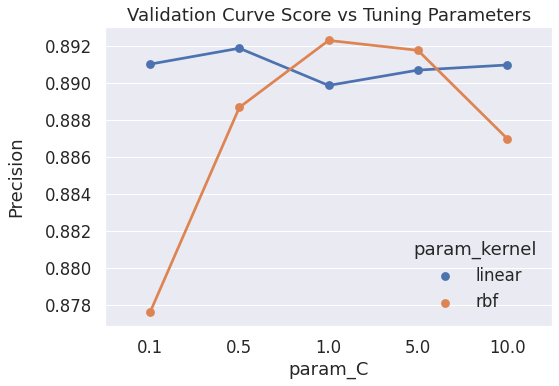

In [ ]:
#YOUR CODE STARTS HERE#

# Store the result in a dataframe and select the columns of interest
df = pd.DataFrame(grid_search.cv_results_)
df["recall"] = recall_vec

# display the top3 configuration
top3 = df.sort_values("rank_test_score", axis = 0).head(3)
top3 = top3.loc[:, ["params", "mean_test_score", "recall"]]

print("Top 3 models for Precision score")
display(top3.reset_index(drop=True))

print("\n\n")

# plotting the accuracy score vs the tuning parameters
sns.set(font_scale=1.5)
sns.pointplot(x = df["param_C"], y = df["mean_test_score"],
              hue = df['param_kernel'],
              linewidth = 3).set(title = 'Validation Curve Score vs Tuning Parameters')
plt.ylabel("Precision", labelpad = 20)
plt.show()






#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Explain the results obtained in **at most 3 sentences**.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

1. The result we achieve are very satisfying, infact we achieve almost $90\%$ of accuracy with a simple grid and using a powerfull method. 

2. Also from the results of the SVM tuning on the kernel,  seems that a linear separator gives high and consistent result on text classification.

3. Also the recall on the validation set is very high for the top3 models, and slightly better in the linear case, but for the right choice we will focus on higher precision.

### 2.1.7
Select the combination of hyper-parameters that achieves the best performance, as defined in step 2.1.

Apply the classifier that uses these parameters to obtain the confusion matrix on the test data and print it out.

In [ ]:
#YOUR CODE STARTS HERE#

# -------- SELECT THE BEST CLASSIFIER  ------------- #
best_params = grid_search.best_params_

svc_fitted = SVC(**best_params).fit(train, training_y)

# -------- PREDICT ON THE TEST AND RESULTS ------------- #
test = embedding["test"]
prediction_y = svc_fitted.predict(test)

print("The Recall and Precision on the test set are:\n")
print({"recall":    sklearn.metrics.recall_score(test_y, prediction_y), 
      "precision": 	sklearn.metrics.precision_score(test_y, prediction_y)})

# Compute the confusion matrix
confusion_matrix_SVC = sklearn.metrics.confusion_matrix(test_y, prediction_y)

print()
print()
# display
print("The confusion matrix for the SVC is:")
display(pd.DataFrame(confusion_matrix_SVC))





#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

The Recall and Precision on the test set are:

{'recall': 0.8783625730994152, 'precision': 0.8924539512774807}


The confusion matrix for the SVC is:


,0,1
0,1403,181
1,208,1502


## Part 2.2

In this part, you can choose any data transformation you want, as long as each sample, after the transformation, has a size of **exactly 512 values**.

Then repeat as many parts of pipeline 2.1 as you deem necessary; use the data defined in step 2.1.1.

The goal is to find **ONE** classifier that can receive as input for each document a vector of 512 values and that minimises False Positives on the test set defined in step 1.1.2.

The whole process (all Part 2.2) can't take more than **5 minutes**.

### 2.2.1
Prepare the data and the classifier according to the specifications in Part 2.2.


In [ ]:
#YOUR CODE STARTS HERE#

# Download the Sentence Trasformer
model = SentenceTransformer("distiluse-base-multilingual-cased-v1")

# start the timer 
start_time = time.time()
# apply the encoding
train_transformed = model.encode(training_x, show_progress_bar=False)
validation_transformed = model.encode(validation_x, show_progress_bar=False)
test_transformed = model.encode(test_x, show_progress_bar=False)

# Define the model
clf = RandomForestClassifier()
parameters = {"n_estimators": [20, 30,50],
              "max_depth": [None, 15, 25],
              "min_samples_split": [0.001, 0.005, 0.01],
              "n_jobs": [-1], "random_state": [2468],
              }

# Reconstruct the original dataset and do grid search crossvalidation as in previous points
reconstructed_original_train_x = np.concatenate([train_transformed, validation_transformed])
reconstructed_original_train_y = np.concatenate([training_y, validation_y])

split_index = np.concatenate([
    # The training data.
    np.full(fill_value = -1, shape = train_transformed.shape[0], dtype = np.int8),
    # The validation data.
    np.zeros(validation_transformed.shape[0], dtype = np.int8)
])

pds = PredefinedSplit(test_fold = split_index)

grid_search = GridSearchCV(estimator = clf,
                   param_grid = parameters,
                   scoring = "precision",
                   cv = pds, verbose = 1, 
                    )

# Fit with all data
grid_search.fit(reconstructed_original_train_x, reconstructed_original_train_y)
print("\n")
print(f"--- Best score on the validation set: {grid_search.best_score_} ---")
print(f"--- Best model: {grid_search.best_estimator_} ---")



# select the best classifier
best_params = grid_search.best_params_
clf_fitted = RandomForestClassifier(**best_params).fit(train_transformed, training_y)








#YOUR CODE ENDS HERE#
#THIS IS LINE 60#

Fitting 1 folds for each of 27 candidates, totalling 27 fits


--- Best score on the validation set: 0.8178053830227743 ---
--- Best model: RandomForestClassifier(max_depth=15, min_samples_split=0.01, n_estimators=50,
                       n_jobs=-1, random_state=2468) ---


Explain in **at most 3 sentences** which strategy you adopted.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------


1.   We used a sentence transformer which allows us to obtain vectors of input for the model of shape (n_samples, 512), as required from the task.
2.   Then we performed a grid search cross validation trying to get the best possible score, respecting the time requirements optimizing the choice of the hyperparameters range.
3. We then take the best model with best performance according to the "precision" metric (because we have to minimise False Positives on the test set) and evaluate the performance predicting the test set.




### 2.2.2
Using the classifier, obtain the confusion matrix on the test data.

Print the time taken for the whole part 2.2

Print out the confusion matrix.



In [ ]:
#YOUR CODE STARTS HERE#

# predict on the test set 
prediction_y = clf_fitted.predict(test_transformed)
precision_score = sklearn.metrics.precision_score(test_y, prediction_y)
print(f"--- Precision score on the test set: {grid_search.best_score_} ---")

# obtain the confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(test_y, prediction_y)

# Display
print("The confusion matrix for the RF is:")
display(pd.DataFrame(confusion_matrix))
print()
# Print total time
end_time = time.time()
minutes, seconds = divmod(end_time - start_time, 60)
print(f"--- Total time: {minutes}:{seconds} min ---")

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

--- Precision score on the test set: 0.8178053830227743 ---
The confusion matrix for the RF is:


,0,1
0,1252,332
1,342,1368



--- Total time: 4.0:17.059141159057617 min ---
